<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.298829,216.118934,216.491079,-0.372146
1,0.0,1.0,57.329540,39.507566,24.860616,-0.721328,130.976394,131.740325,-0.763931
2,0.0,2.0,45.215694,88.427736,44.633052,-0.044066,188.232415,188.211673,0.020742
3,0.0,3.0,69.375325,88.876246,36.273616,0.276671,204.801857,204.435701,0.366157
4,0.0,4.0,87.837297,74.451291,38.863401,0.298473,211.450462,211.106239,0.344222
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.436077,25.947101,66.531309,0.824412,201.738899,200.712619,1.026280
119996,999.0,116.0,50.891445,77.514401,57.753055,0.987842,197.146744,196.162032,0.984712
119997,999.0,117.0,67.435001,95.976964,70.063102,-0.826707,242.648360,243.460183,-0.811823
119998,999.0,118.0,81.643651,78.561535,70.192199,-0.040290,240.357095,240.317032,0.040063


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.118934  216.491079 -0.372146
      1.0    57.329540  39.507566  24.860616  ...  130.976394  131.740325 -0.763931
      2.0    45.215694  88.427736  44.633052  ...  188.232415  188.211673  0.020742
      3.0    69.375325  88.876246  36.273616  ...  204.801857  204.435701  0.366157
      4.0    87.837297  74.451291  38.863401  ...  211.450462  211.106239  0.344222
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  98.436077  25.947101  66.531309  ...  201.738899  200.712619  1.026280
      116.0  50.891445  77.514401  57.753055  ...  197.146744  196.162032  0.984712
      117.0  67.435001  95.976964  70.063102  ...  242.648360  243.460183 -0.811823
      118.0  81.643651  78.561535  70.192199  ...  240.357095  240.317032  0.040063
      119.0  77.634092  29.926969  23.393475  ...  142.762728  140.793023  1.969706

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.118934  216.491079 -0.372146
      1.0    57.329540  39.507566  24.860616  ...  130.976394  131.740325 -0.763931
      2.0    45.215694  88.427736  44.633052  ...  188.232415  188.211673  0.020742
      3.0    69.375325  88.876246  36.273616  ...  204.801857  204.435701  0.366157
      4.0    87.837297  74.451291  38.863401  ...  211.450462  211.106239  0.344222
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  98.436077  25.947101  66.531309  ...  201.738899  200.712619  1.026280
      116.0  50.891445  77.514401  57.753055  ...  197.146744  196.162032  0.984712
      117.0  67.435001  95.976964  70.063102  ...  242.648360  243.460183 -0.811823
      118.0  81.643651  78.561535  70.192199  ...  240.357095  240.317032  0.040063
      119.0  77.634092  29.926969  23.393475  ...  142.762728  140.793023  1.969706

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,61.191777,76.371465,-0.298829,216.118934,216.491079,-0.372146
1,0.0,1.0,57.329540,39.507566,24.860616,-0.721328,130.976394,131.740325,-0.763931
2,0.0,2.0,45.215694,88.427736,44.633052,-0.044066,188.232415,188.211673,0.020742
3,0.0,3.0,69.375325,88.876246,36.273616,0.276671,204.801857,204.435701,0.366157
4,0.0,4.0,87.837297,74.451291,38.863401,0.298473,211.450462,211.106239,0.344222
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,98.436077,25.947101,66.531309,0.824412,201.738899,200.712619,1.026280
119996,999.0,116.0,50.891445,77.514401,57.753055,0.987842,197.146744,196.162032,0.984712
119997,999.0,117.0,67.435001,95.976964,70.063102,-0.826707,242.648360,243.460183,-0.811823
119998,999.0,118.0,81.643651,78.561535,70.192199,-0.040290,240.357095,240.317032,0.040063


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  61.191777  76.371465  ...  216.118934  216.491079 -0.372146
      1.0    57.329540  39.507566  24.860616  ...  130.976394  131.740325 -0.763931
      2.0    45.215694  88.427736  44.633052  ...  188.232415  188.211673  0.020742
      3.0    69.375325  88.876246  36.273616  ...  204.801857  204.435701  0.366157
      4.0    87.837297  74.451291  38.863401  ...  211.450462  211.106239  0.344222
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  98.436077  25.947101  66.531309  ...  201.738899  200.712619  1.026280
      116.0  50.891445  77.514401  57.753055  ...  197.146744  196.162032  0.984712
      117.0  67.435001  95.976964  70.063102  ...  242.648360  243.460183 -0.811823
      118.0  81.643651  78.561535  70.192199  ...  240.357095  240.317032  0.040063
      119.0  77.634092  29.926969  23.393475  ...  142.762728  140.793023  1.969706

[120000 rows x 7 columns]

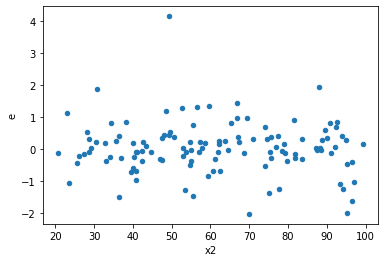

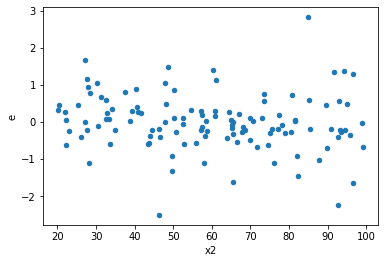

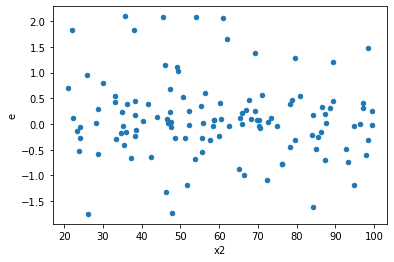

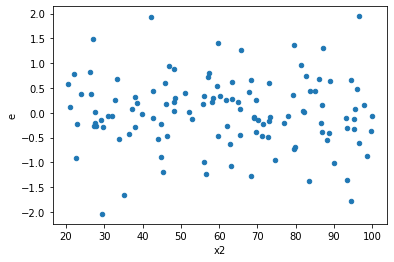

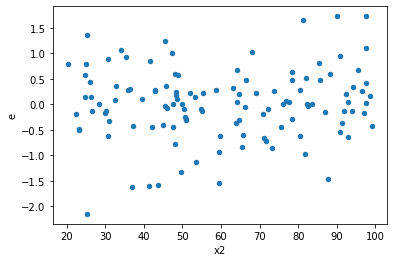

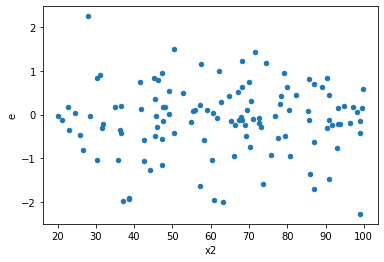

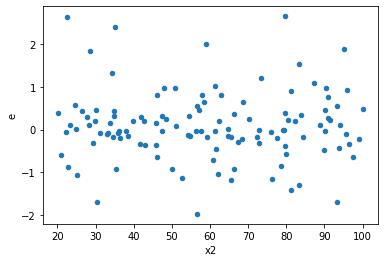

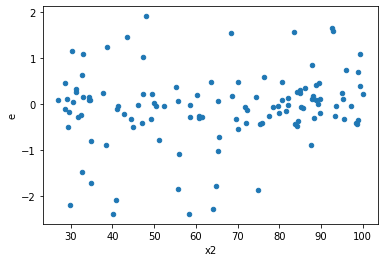

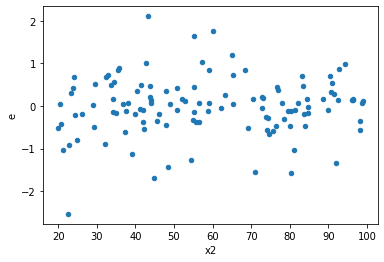

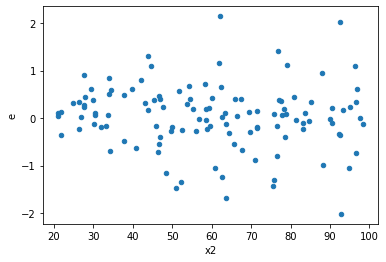

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,56.0,58.0,23.940074761369797,39.97876322858345,0.43527408657035993,0.7013818110277799,1.6123669441711423,0.0746309124067519,0.962684543796624,Reject001=1 : Homoscedasticity
5.0,52.0,62.0,24.686870153177658,50.540032322272964,0.4840562775132874,0.8285251200372618,1.7170428629779602,0.046737144485184734,0.9766314277574076,Reject001=1 : Homoscedasticity
6.0,55.0,59.0,30.53284990689899,43.720639311604145,0.5654231464240553,0.7538041260621404,1.3348419258637667,0.28102713700888704,0.8594864314955565,Reject001=1 : Homoscedasticity
11.0,57.0,57.0,18.413646248155143,22.668940163908196,0.32881511157419896,0.4048025029269321,1.2310945837888783,0.43498726947172073,0.7825063652641396,Reject001=1 : Homoscedasticity
13.0,54.0,60.0,21.670708247888797,28.42224879321368,0.40888128769601506,0.48173303039345217,1.1803963036780012,0.5375357658037394,0.7312321170981303,Reject001=1 : Homoscedasticity
14.0,54.0,60.0,21.1876350671624,25.20660359812948,0.39976669938042264,0.4272305694598217,1.0707161590429826,0.8013490854935736,0.5993254572532132,Reject001=1 : Homoscedasticity
15.0,60.0,54.0,22.749210540623103,20.693677028367286,0.385579839671578,0.3904467363842884,1.010715270092791,0.9643688717242909,0.5178155641378546,Reject001=1 : Homoscedasticity
16.0,60.0,54.0,23.815937718966467,25.669071036348175,0.4036599613384147,0.48432209502543727,1.1975673759708079,0.49527284059018806,0.752363579704906,Reject001=1 : Homoscedasticity
17.0,58.0,56.0,18.574593216672902,33.60832165227969,0.32587005643285794,0.6110603936778126,1.8739909104928314,0.018923087313793774,0.9905384563431031,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,56.0,58.0,44.33917333240496,31.671013100841304,0.8061667878619084,0.5556318087866895,0.6896589833005281,0.1629151935614477,Reject001=1 : Homoscedasticity
1.0,56.0,58.0,23.940074761369797,39.97876322858345,0.43527408657035993,0.7013818110277799,1.6123669441711423,0.0746309124067519,Reject001=1 : Homoscedasticity
2.0,56.0,58.0,32.855585810239326,26.321543181838834,0.5973742874588969,0.46178145933050585,0.7735032912989569,0.3340135392926979,Reject001=1 : Homoscedasticity
3.0,62.0,52.0,34.46765496426152,22.848005885863405,0.5650435240042873,0.44800011540908635,0.7903599243944106,0.3848428938602174,Reject001=1 : Homoscedasticity
4.0,73.0,41.0,35.73396212661633,14.749755167074287,0.496305029536338,0.3687438791768572,0.7349243587055735,0.2858460605800307,Reject001=1 : Homoscedasticity
5.0,52.0,62.0,24.686870153177658,50.540032322272964,0.4840562775132874,0.8285251200372618,1.7170428629779602,0.046737144485184734,Reject001=1 : Homoscedasticity
6.0,55.0,59.0,30.53284990689899,43.720639311604145,0.5654231464240553,0.7538041260621404,1.3348419258637667,0.28102713700888704,Reject001=1 : Homoscedasticity
7.0,51.0,63.0,40.45271837108673,26.154339014953464,0.8090543674217346,0.4218441776605398,0.5233902938422861,0.014866241752129992,Reject001=1 : Homoscedasticity
8.0,57.0,57.0,29.343188304783286,22.650579333232855,0.5239855054425587,0.4044746309505867,0.7719195030193956,0.3312456593733395,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      936
Reject001=0 : Heteroscedasticity     64
Name: Result_test, dtype: int64